In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
%matplotlib inline

In [2]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [3]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

<b>1. sales_of_company_x</b>

In [5]:
series_1 = sales_of_company_x['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\79653\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


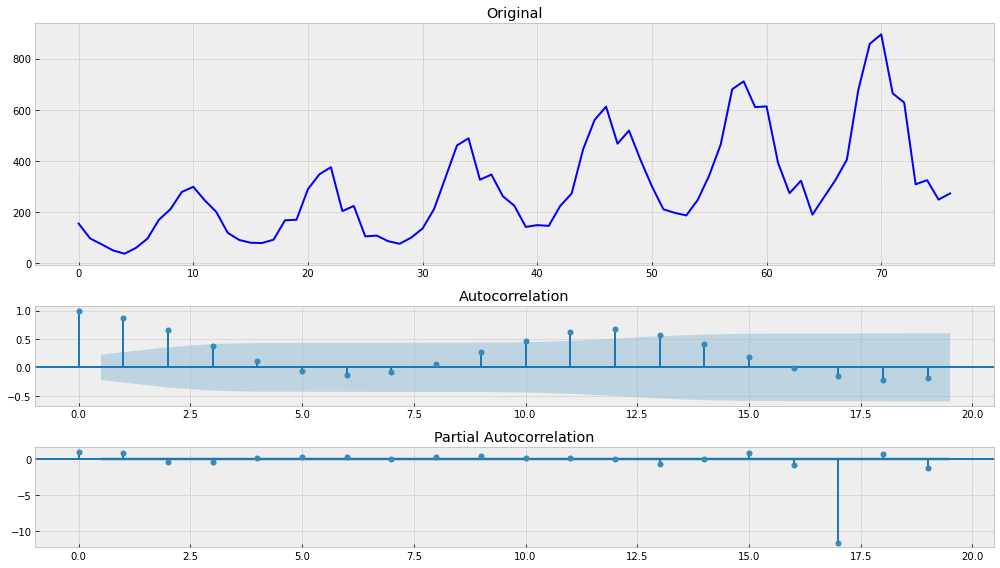

In [6]:
tsplot(series_1)

In [7]:
series_1_1, l = stats.boxcox(series_1)

Results of Dickey-Fuller Test:
Test Statistic                 -0.631279
p-value                         0.863757
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\79653\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


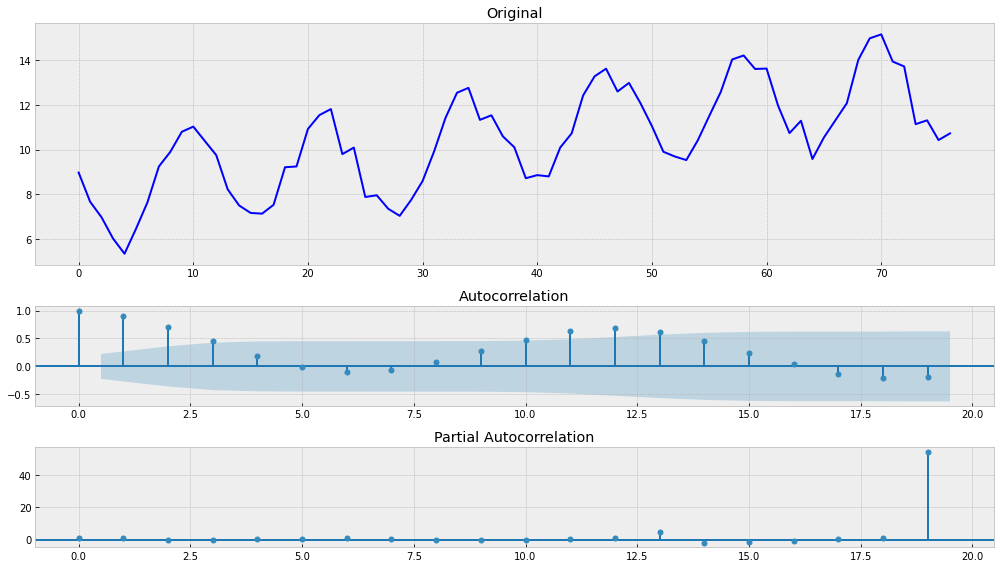

In [8]:
tsplot(series_1_1)

In [9]:
series_1_1_1 = series_1_1[1:] - series_1_1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -3.284204
p-value                         0.015599
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


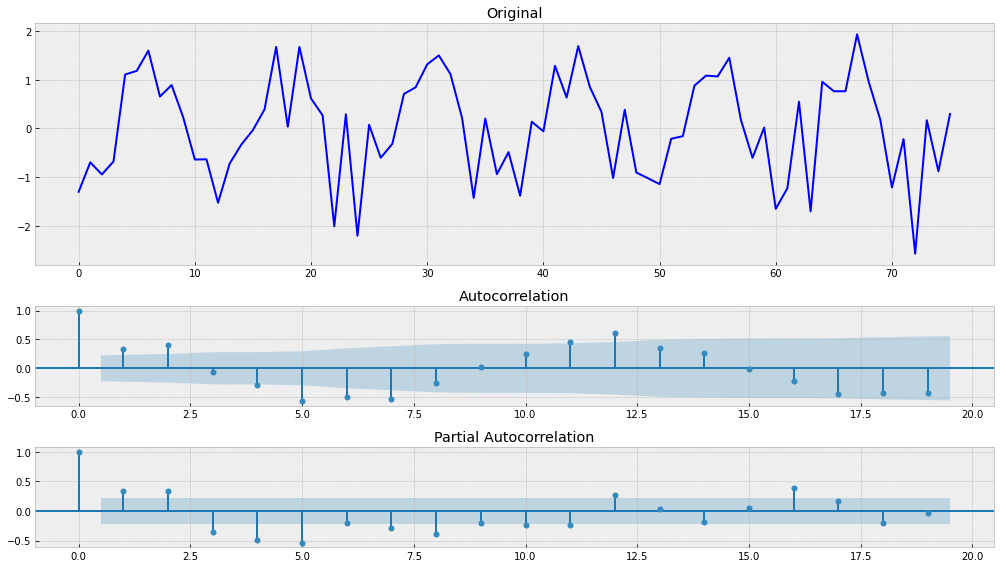

In [10]:
tsplot(series_1_1_1)

<b> 2. robberies_in_boston </b>

In [11]:
series_2 = robberies_in_boston['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


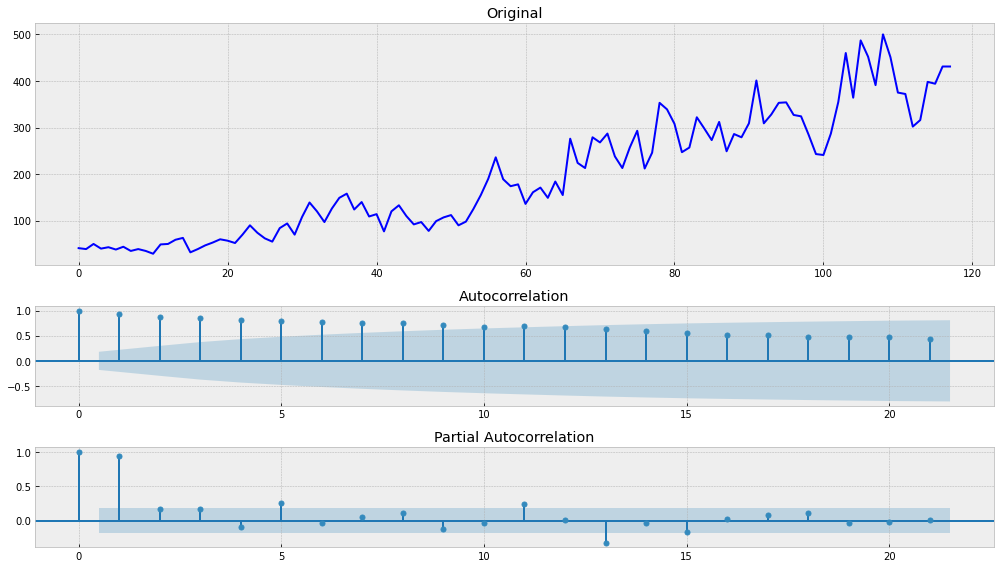

In [12]:
tsplot(series_2)

In [13]:
series_2_1, l = stats.boxcox(series_2)

Results of Dickey-Fuller Test:
Test Statistic                  -0.876346
p-value                          0.795662
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


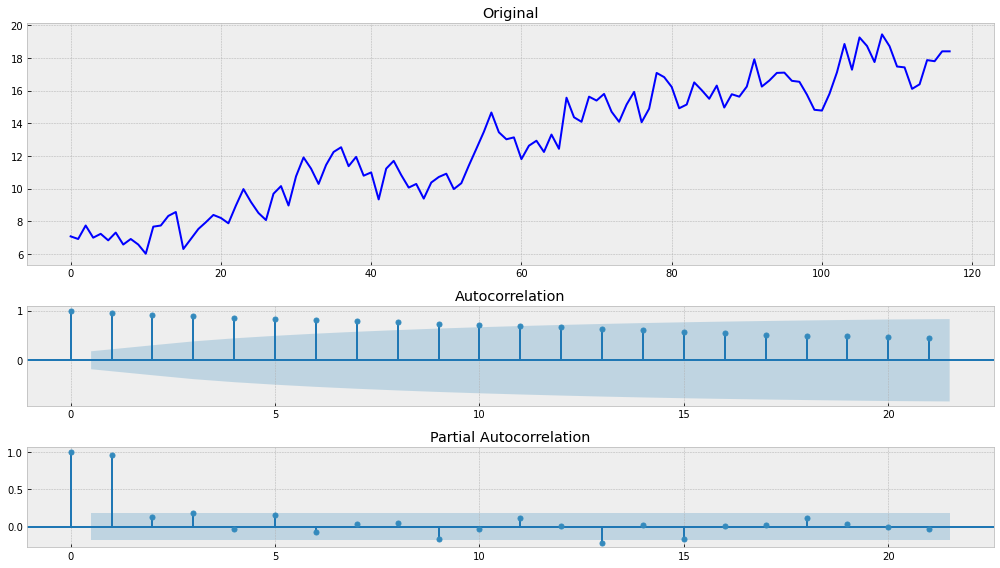

In [14]:
tsplot(series_2_1)

In [15]:
series_2_1_1 = series_2_1[1:] - series_2_1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                -5.862061e+00
p-value                        3.392206e-07
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


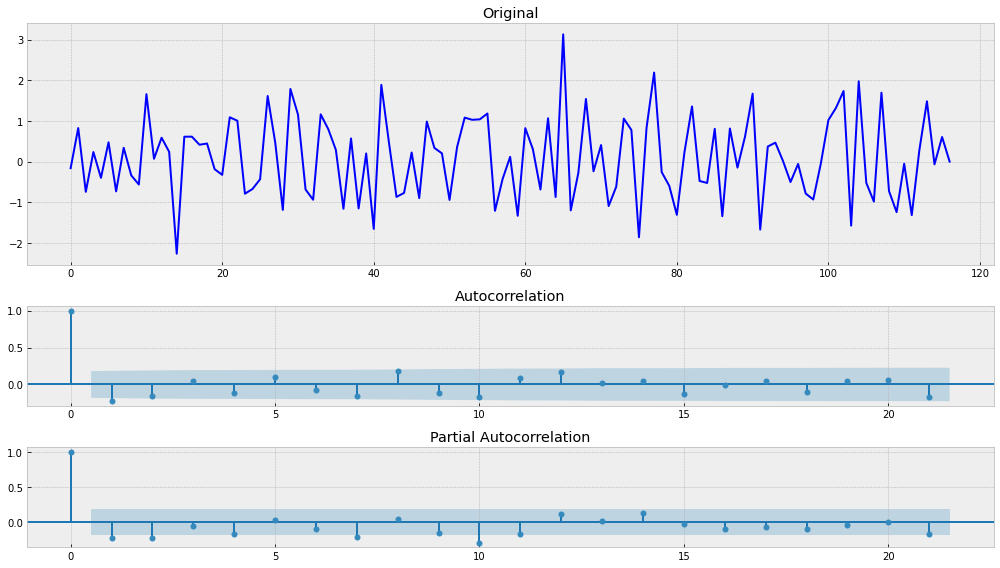

In [16]:
tsplot(series_2_1_1)

<b> 3.airlines_passengers </b>

In [17]:
series_3 = airlines_passengers['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


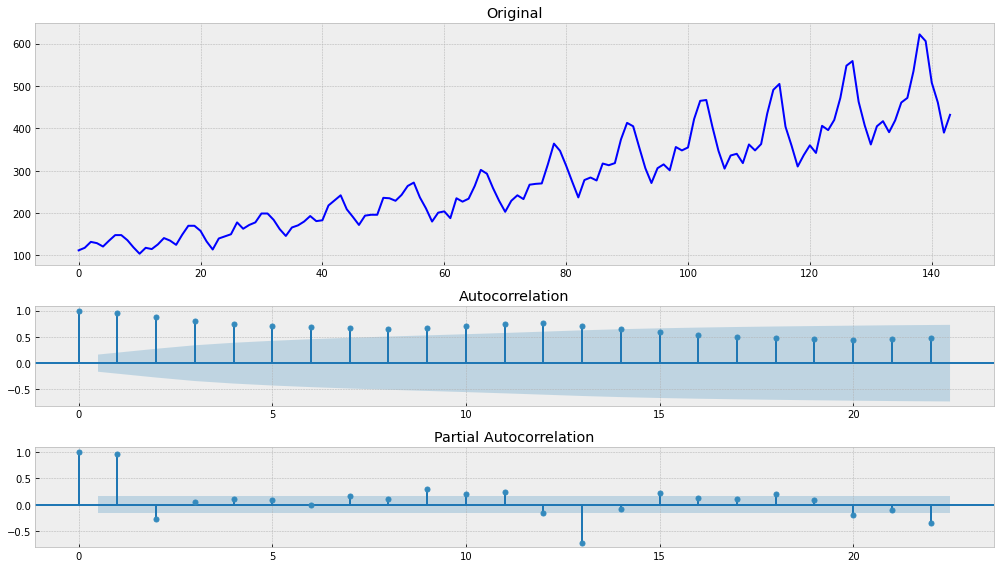

In [18]:
tsplot(series_3)

In [19]:
series_3_1, l = stats.boxcox(series_3)

Results of Dickey-Fuller Test:
Test Statistic                  -1.326071
p-value                          0.617162
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


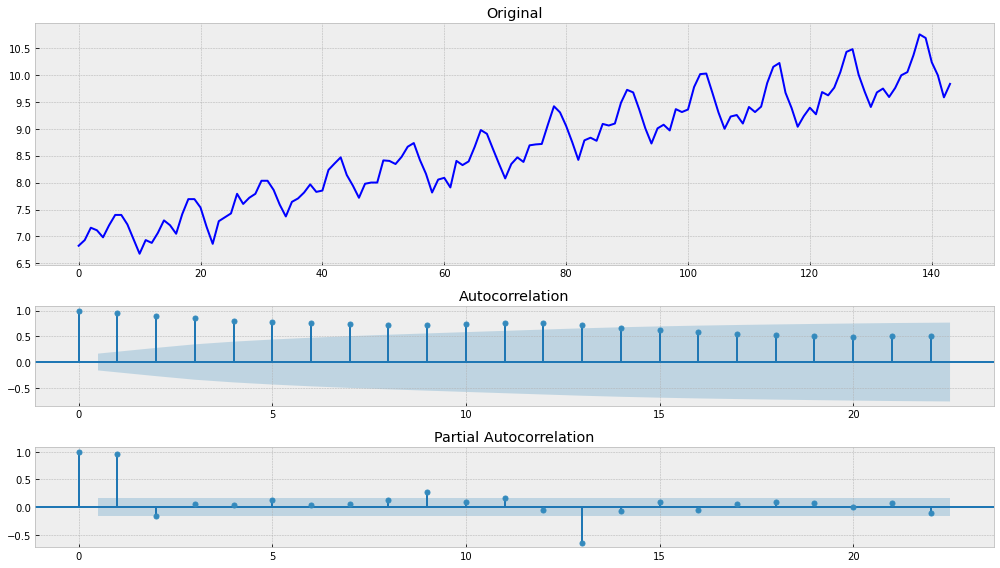

In [20]:
tsplot(series_3_1)

In [21]:
series_3_1_1 = series_3_1[1:] - series_3_1[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.871708
p-value                          0.048738
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


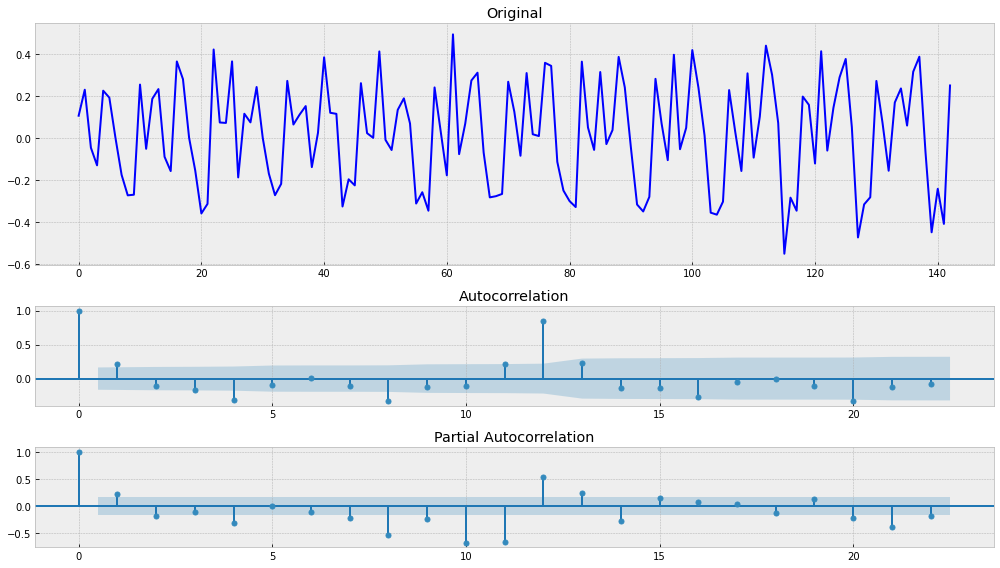

In [22]:
tsplot(series_3_1_1)

<b>4.mean_monthly_temp</b>

In [23]:
series_4 = mean_monthly_temp['Deg']

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


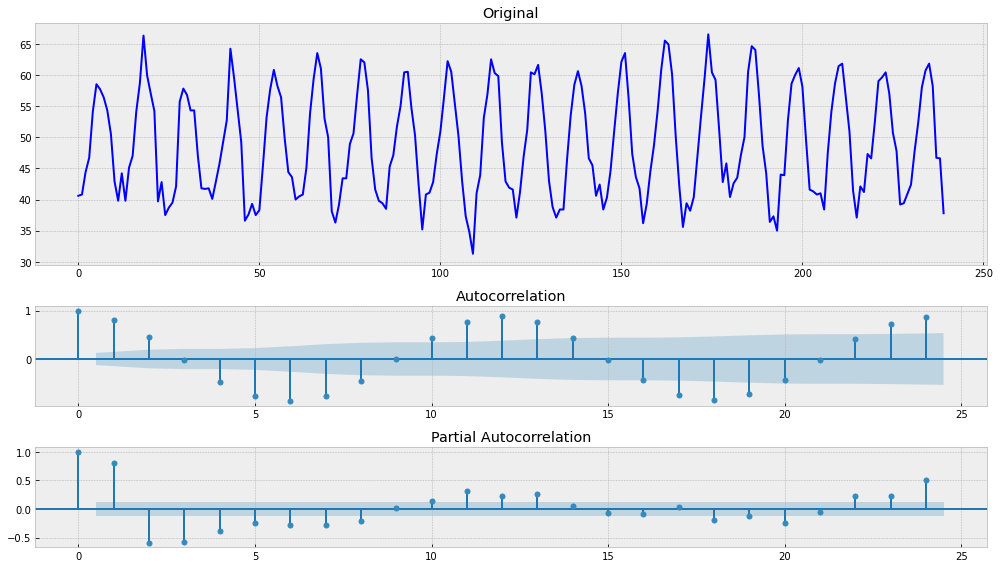

In [24]:
tsplot(series_4)

<b>5.dowjones_closing</b>

In [25]:
series_5 = dowjones_closing['Close']

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


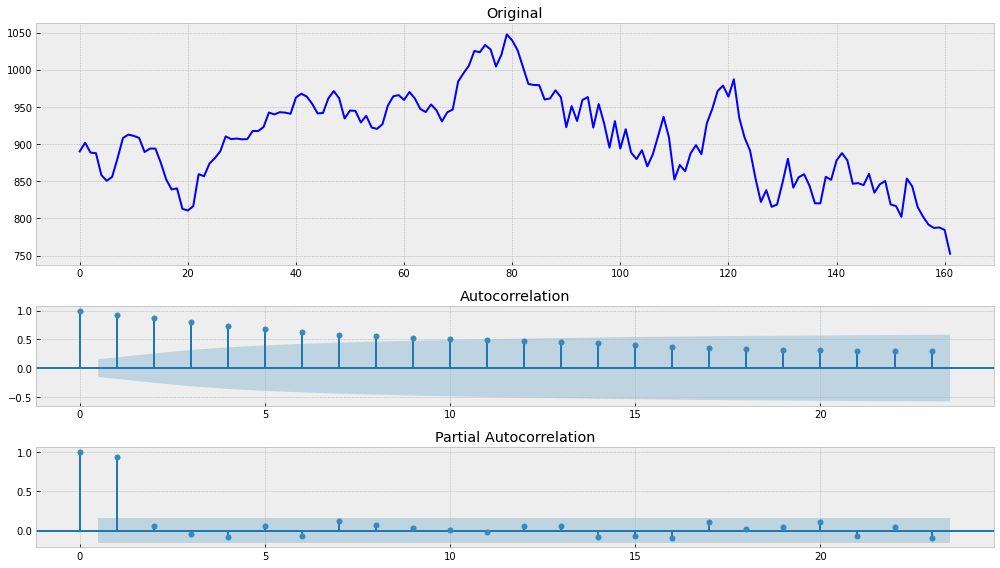

In [26]:
tsplot(series_5)

In [36]:
series_5_1, l = stats.boxcox(series_5)

In [37]:
series_5_1_1 = series_5_1[1:] - series_5_1[:-1]

In [38]:
series_5_1_1

array([  28.64096008,  -32.78129575,   -1.79875048,  -72.1553533 ,
        -19.17026812,   13.25981255,   61.1474854 ,   67.18409527,
         11.37199656,   -4.32720232,   -6.87179934,  -46.66855737,
         11.51308668,   -0.17263212,  -46.93803714,  -55.18574574,
        -32.73052348,    3.39959205,  -66.99615435,   -5.52699728,
         14.32084846,  105.23665312,   -6.96603749,   41.86650492,
         18.13087729,   22.24208987,   49.78930924,   -9.11975504,
          1.87792107,   -2.61914816,    0.74122709,   26.97801918,
         -0.17323092,   13.04671445,   48.70872659,   -6.35670434,
          7.474331  ,   -1.49015312,   -3.92346678,   54.45968236,
         12.75601998,   -9.76713458,  -23.97182513,  -32.1607405 ,
          1.48993252,   49.01397724,   24.19569362,  -24.56921484,
        -66.95784226,   26.34035424,   -0.91922464,  -38.861511  ,
         22.39812059,  -39.17156796,   -4.48171628,   15.48048438,
         62.2090887 ,   30.91257479,    4.11073955,  -16.11372

Results of Dickey-Fuller Test:
Test Statistic                -1.302750e+01
p-value                        2.382691e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


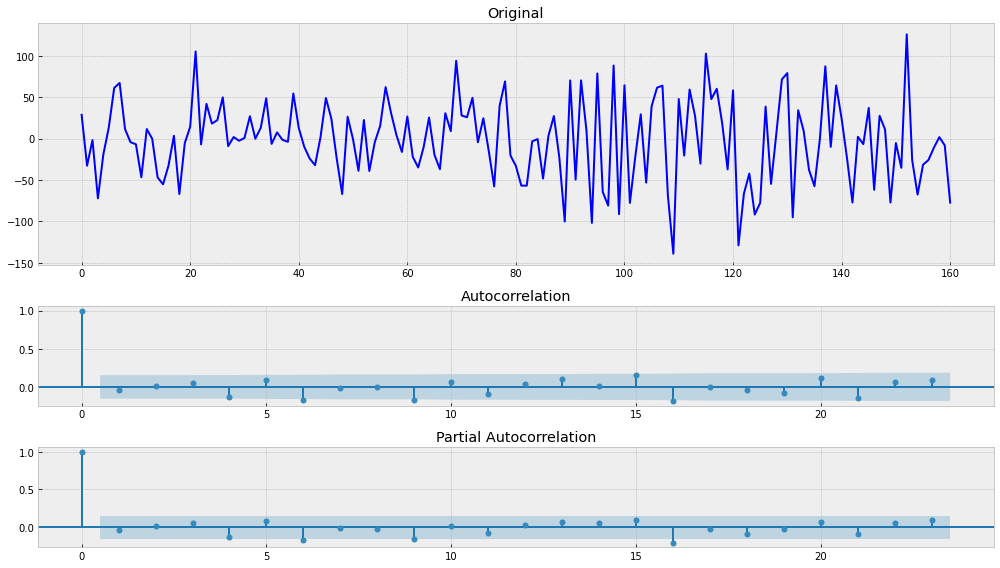

In [40]:
tsplot(series_5_1_1)

<b>6.female_births</b>

In [34]:
series_6 = female_births['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


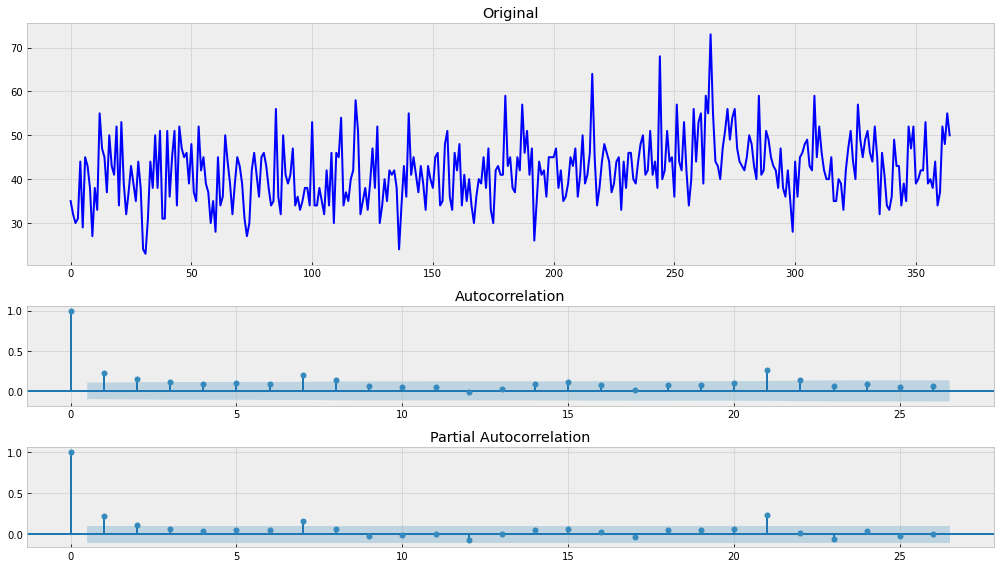

In [35]:
tsplot(series_6)